## PYCARET
PyCaret es una biblioteca de aprendizaje automático de código abierto y bajo en Python que automatiza los flujos de trabajo de aprendizaje automático. Es una herramienta de gestión de modelos y aprendizaje automático de un extremo a otro que acelera exponencialmente el ciclo experimental y lo hace más productivo.

Se puede utilizar para problemas de clasificación binarios o multiclase. Tiene mas de 11 algoritmos y 14 tipos de graficos para analizar el rendimiento de modelos, ya sea ajuste de hiperparametros, ensamblaje o técnicas avanzadas como stacking el modulo de claficación.

En comparación con otras bibliotecas de aprendizaje automático de código abierto, PyCaret es una biblioteca alternativa de código bajo que se puede utilizar para reemplazar cientos de líneas de código con solo unas pocas líneas. Esto hace que los experimentos sean exponencialmente rápidos y eficientes. PyCaret es esencialmente un contenedor de Python para varias bibliotecas y marcos de aprendizaje automático, como scikit-learn, XGBoost, LightGBM, CatBoost, Optuna, Hyperopt, Ray y algunos más.



### 1. Importar librerias

In [2]:
import pycaret
from pycaret.datasets import get_data
import numpy as np

### 2. Cargar el data set

In [3]:

dataset = get_data('credit')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Las descripciones de las columnas son las siguientes:
-ID: ID de cada cliente
-LIMIT_BAL: Monto de  crédito otorgado en dolares NT
-SEX: Genero(1=male, 2=female)
-EDUCATION:(1:Graduate school, 2:university, 3:high school, 4:others, 5:unknown, 6:unknown)
-MARRIAGE:Estado civil (1=married, 2=single, 3=others)
-AGE:Edad del cliente
-PAY_0 TO PAY_6: Estado de pago hace n meses (PAY_0= Ultimo mes PAY_6= Hace 6 meses)
-BILL_AMT1 to BILL_AMT6:Monto de pago por hace n meses
default: Pago predeterminado(1=yes, 0=no) Target Column

In [4]:
#revisar el tamaño de la data
dataset.shape

(30000, 25)

In [5]:
data=dataset.sample(frac=0.95, random_state=785)
data_unseen=dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [6]:
print('Datos para el modelado:' + str(data.shape))
print('datos invisibles para predicciones:' + str(data_unseen.shape))

Datos para el modelado:(28500, 25)
datos invisibles para predicciones:(1500, 25)


### 3. Configuración del entorno de PyCaret

In [7]:
import scikitplot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [8]:
from pycaret.classification import *

In [9]:
tabla= setup(data = data, target ='default.payment.next.month', session_id=123)

,Description,Value
0,Session id,123
1,Target,default.payment.next.month
2,Target type,Binary
3,Original data shape,"(28500, 25)"
4,Transformed data shape,"(28500, 25)"
5,Transformed train set shape,"(19950, 25)"
6,Transformed test set shape,"(8550, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


### 4. Comparacion de modelos
Comparando todos los modelos para evaluar el rendimiento es el punto de partida recomendado para el modelado una vez que que se completa la configuración ( a menos que sepa exactamente que tipo de modelo necesita, lo que en genral no es el caso). Esta función entrena todos los modelos en la biclioteca de modelos y los puntua mediante validación cruzada estratificada para evaluación de métricas. La salida imprime una cuadricula de puntuación que muestra la Precisión promedio, AUC, Recuperación, Precisión, F1, Kappa y MCC en los pliegues junto con los tiempos de entrenamiento

In [12]:
best_model= compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:44:30
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8216,0.7841,0.3665,0.6810,0.4764,0.3804,0.4070,3.3910
lightgbm,Light Gradient Boosting Machine,0.8200,0.7799,0.3710,0.6697,0.4773,0.3793,0.4035,0.3120
rf,Random Forest Classifier,0.8183,0.7686,0.3767,0.6578,0.4788,0.3785,0.4003,1.9320
ada,Ada Boost Classifier,0.8172,0.7762,0.3233,0.6862,0.4393,0.3467,0.3818,0.7650
et,Extra Trees Classifier,0.8121,0.7625,0.3685,0.6306,0.4648,0.3603,0.3796,0.7960
lda,Linear Discriminant Analysis,0.8120,0.7203,0.2600,0.7075,0.3798,0.2960,0.3480,0.0610
ridge,Ridge Classifier,0.7989,0.0000,0.1490,0.7269,0.2471,0.1857,0.2651,0.0350
lr,Logistic Regression,0.7783,0.6513,0.0002,0.1000,0.0005,0.0003,0.0030,1.0280
dummy,Dummy Classifier,0.7783,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
svm,SVM - Linear Kernel,0.7492,0.0000,0.1508,0.4334,0.1753,0.0786,0.0979,0.1610


In [13]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### 5. Creando un modelo

In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
dt=create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:22:41
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7313,0.6227,0.4276,0.4004,0.4136,0.2396,0.2398
1,0.7028,0.5906,0.3891,0.3475,0.3671,0.1737,0.1742
2,0.7368,0.6214,0.4140,0.4076,0.4108,0.2414,0.2414
3,0.7138,0.6001,0.3959,0.3653,0.3800,0.1944,0.1946
4,0.7253,0.6083,0.3982,0.3843,0.3911,0.2138,0.2139
5,0.7298,0.6120,0.4005,0.3925,0.3964,0.2224,0.2224
6,0.7188,0.6025,0.3937,0.3726,0.3828,0.2009,0.2011
7,0.7248,0.6183,0.4266,0.3905,0.4078,0.2290,0.2294
8,0.7363,0.6297,0.4379,0.4119,0.4245,0.2537,0.2539


In [16]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


### 5.1 Clasificando Random Forest

In [17]:
rf =create_model ('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8211,0.7801,0.4005,0.6580,0.4979,0.3968,0.4149
1,0.8175,0.7622,0.3665,0.6585,0.4709,0.3713,0.3946
2,0.8256,0.7609,0.3801,0.6942,0.4912,0.3966,0.4229
3,0.8100,0.7664,0.3439,0.6307,0.4451,0.3423,0.3652
4,0.8175,0.7605,0.3846,0.6489,0.4830,0.3809,0.4001
5,0.8110,0.7528,0.3348,0.6407,0.4398,0.3393,0.3652
6,0.8180,0.7716,0.3891,0.6491,0.4866,0.3843,0.4029
7,0.8221,0.7819,0.3815,0.6760,0.4877,0.3900,0.4134
8,0.8271,0.7902,0.3995,0.6914,0.5064,0.4106,0.4333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


### 5.2 Clasificando K Neighbors

In [19]:
knn=create_model ('knn')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:25:14
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7534,0.5912,0.1719,0.3762,0.2360,0.1127,0.1250
1,0.7474,0.6050,0.1900,0.3652,0.2500,0.1159,0.1249
2,0.7479,0.5918,0.1742,0.3581,0.2344,0.1046,0.1143
3,0.7424,0.5952,0.1810,0.3448,0.2374,0.1001,0.1077
4,0.7338,0.5701,0.1584,0.3057,0.2086,0.0676,0.0729
5,0.7469,0.5799,0.1810,0.3587,0.2406,0.1081,0.1172
6,0.7464,0.5924,0.1674,0.3491,0.2263,0.0965,0.1059
7,0.7459,0.6068,0.1625,0.3462,0.2212,0.0924,0.1019
8,0.7398,0.5929,0.1693,0.3319,0.2242,0.0873,0.0944


In [20]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### 6.Tune Model
#### 6.1 Clasificador Decision Tree

In [21]:
tuned_dt=tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:26:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.6552,0.3529,0.7027,0.4699,0.3777,0.4100
1,0.8185,0.6431,0.3281,0.6905,0.4448,0.3524,0.3873
2,0.8286,0.6544,0.3416,0.7475,0.4689,0.3832,0.4251
3,0.8110,0.6269,0.2964,0.6650,0.4100,0.3167,0.3534
4,0.8226,0.6497,0.3394,0.7075,0.4587,0.3679,0.4035
5,0.8140,0.6289,0.2964,0.6859,0.4139,0.3234,0.3638
6,0.8190,0.6483,0.3416,0.6833,0.4555,0.3611,0.3924
7,0.8231,0.6500,0.3386,0.7143,0.4594,0.3693,0.4062
8,0.8276,0.6617,0.3634,0.7220,0.4835,0.3933,0.4267


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


#### 6.2 Clasificador K Neighbords

In [23]:
tuned_knn=tune_model(knn, custom_grid={'n_neighbors': np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7845,0.6704,0.0520,0.6765,0.0966,0.0671,0.1442
1,0.7805,0.6496,0.0566,0.5435,0.1025,0.0633,0.1191
2,0.7825,0.6317,0.0475,0.6176,0.0882,0.0584,0.1256
3,0.7734,0.6457,0.0452,0.4000,0.0813,0.0380,0.0689
4,0.7799,0.6657,0.0543,0.5333,0.0986,0.0601,0.1140
5,0.7729,0.6213,0.0407,0.3830,0.0736,0.0324,0.0604
6,0.7815,0.6367,0.0430,0.5938,0.0802,0.0518,0.1144
7,0.7759,0.6390,0.0429,0.4524,0.0784,0.0415,0.0813
8,0.7805,0.6695,0.0497,0.5641,0.0913,0.0574,0.1162


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


#### 6.3 Clasificador Random Forest

In [25]:
tuned_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.7729,0.3416,0.7123,0.4618,0.3715,0.4074
1,0.8201,0.7551,0.3620,0.6751,0.4713,0.3745,0.4010
2,0.8276,0.7611,0.3710,0.7130,0.4881,0.3966,0.4272
3,0.8100,0.7419,0.3416,0.6318,0.4435,0.3410,0.3644
4,0.8150,0.7488,0.3891,0.6347,0.4825,0.3777,0.3944
5,0.8110,0.7479,0.2941,0.6667,0.4082,0.3153,0.3528
6,0.8195,0.7619,0.3824,0.6602,0.4842,0.3842,0.4052
7,0.8195,0.7719,0.3657,0.6722,0.4737,0.3761,0.4015
8,0.8281,0.7740,0.3792,0.7119,0.4948,0.4026,0.4317


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [26]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


### 7. Graficas de los Modelos

#### 7.1 Grafico AUC

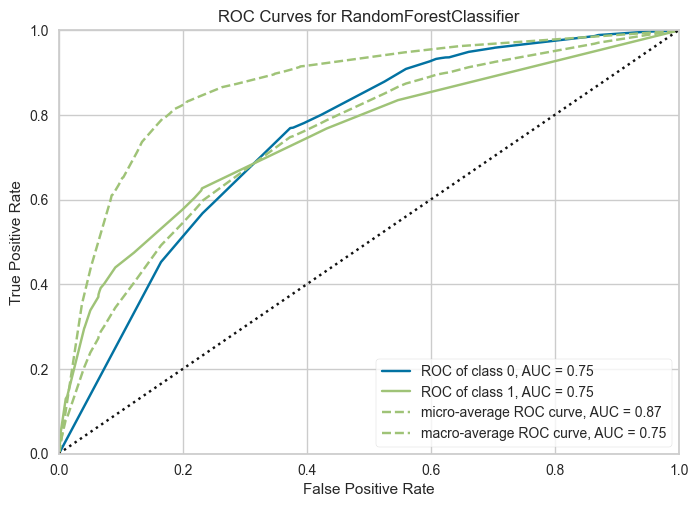

In [27]:
plot_model(tuned_rf, plot= 'auc')

#### 7.2 Precision-Recall Curve

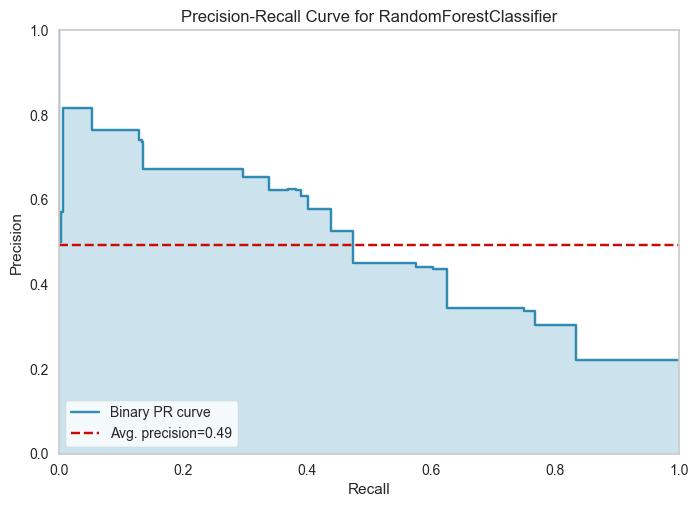

In [28]:
plot_model(tuned_rf, plot='pr')

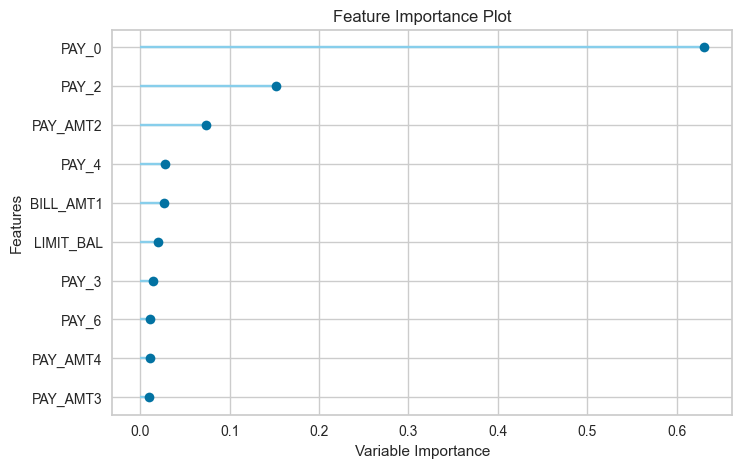

In [29]:
plot_model(tuned_rf, plot='feature')

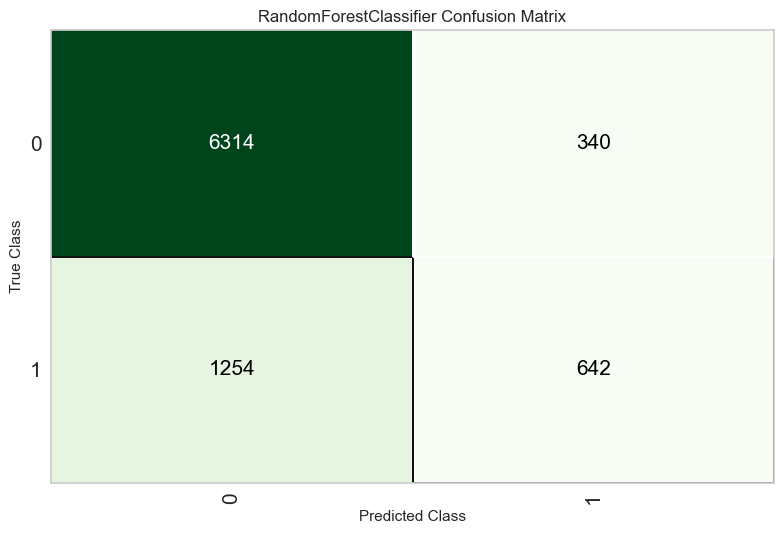

In [30]:
plot_model(tuned_rf, plot='confusion_matrix')

In [31]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 8.Predecir en prueba/muestra reservada

In [32]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8136,0.7473,0.3386,0.6538,0.4461,0.3474,0.3746


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,prediction_label,prediction_score
19147,14153,190000.0,1,2,2,36,0,0,0,0,...,67334.0,3000.0,3034.0,2439.0,3000.0,3000.0,3000.0,0,0,0.9134
9919,7397,200000.0,2,2,1,37,-1,2,-1,-1,...,6136.0,0.0,2192.0,430.0,430.0,6136.0,2923.0,1,0,0.7837
12205,15536,500000.0,1,1,2,41,-1,-1,-2,-2,...,2300.0,0.0,0.0,0.0,0.0,2300.0,0.0,0,0,0.8496
15317,15635,200000.0,2,1,1,38,-2,-2,-2,-2,...,5147.0,12125.0,13416.0,3450.0,13880.0,5147.0,1050.0,0,0,0.9134
6681,25360,260000.0,2,2,2,26,-1,-1,-2,-2,...,-1552.0,288.0,1236.0,316.0,316.0,316.0,316.0,0,0,0.7161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,22824,100000.0,2,2,2,41,-1,-1,-2,-1,...,23399.0,0.0,0.0,50063.0,900.0,1000.0,1000.0,0,0,0.8496
5436,19342,100000.0,2,2,1,41,0,0,0,0,...,74368.0,4000.0,7000.0,3533.0,2673.0,3500.0,4303.0,0,0,0.9134
9385,14368,100000.0,1,1,1,51,2,2,2,2,...,97819.0,8200.0,4000.0,3400.0,4000.0,1600.0,2000.0,1,1,0.7481
6408,1432,70000.0,2,2,1,42,2,2,2,2,...,55797.0,2200.0,2000.0,2500.0,2100.0,2200.0,2100.0,1,1,0.7481


### 9.Finalizar modelo para implementación

In [35]:
final_cf=finalize_model(tuned_rf)

In [36]:
print(final_cf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ID', 'LIMIT_BAL', 'SEX',
                                             'EDUCATION', 'MARRIAGE', 'AGE',
                                             'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                             'PAY_5', 'PAY_6', 'BILL_AMT1',
                                             'BILL_AMT2', 'BILL_AMT3',
                                             'BILL_AMT4', 'BILL_AMT5',
                                             'BILL_AMT6', 'PAY_AMT1',
                                             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                             'PAY_AMT5', 'PAY_AMT6'],
                                    tran...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
           

### 10. Predict on unseen data

In [37]:
unseen_predictions=predict_model(final_cf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8333,0.7674,0.4164,0.6701,0.5136,0.4196,0.4369


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,prediction_label,prediction_score
0,16,50000.0,2,3,3,23,1,2,0,0,...,30211.0,0.0,1500.0,1100.0,1200.0,1300.0,1100.0,0,0,0.6478
1,69,130000.0,2,3,2,29,1,-2,-2,-1,...,7319.0,0.0,0.0,20161.0,0.0,7319.0,13899.0,0,0,0.6796
2,72,320000.0,1,2,2,29,2,2,2,2,...,63526.0,2500.0,2500.0,0.0,4800.0,2400.0,1600.0,1,1,0.7274
3,78,300000.0,2,1,1,45,-1,-1,-1,-1,...,291.0,291.0,291.0,291.0,291.0,291.0,291.0,0,0,0.7742
4,83,60000.0,1,3,2,30,0,0,0,0,...,19771.0,1576.0,1213.0,648.0,768.0,1140.0,0.0,1,0,0.8399


In [41]:
from pycaret.utils.generic import check_metric

check_metric(unseen_predictions['default.payment.next.month'], unseen_predictions['prediction_label'], metric='Accuracy')

0.8333

### 11. Guardando el modelo

In [42]:
save_model(final_cf, 'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ID', 'LIMIT_BAL', 'SEX',
                                              'EDUCATION', 'MARRIAGE', 'AGE',
                                              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                              'PAY_5', 'PAY_6', 'BILL_AMT1',
                                              'BILL_AMT2', 'BILL_AMT3',
                                              'BILL_AMT4', 'BILL_AMT5',
                                              'BILL_AMT6', 'PAY_AMT1',
                                              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                              'PAY_AMT5', 'PAY_AMT6'],
                                     tran...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entrop

### 12. Cargando el modelo gauradado

In [ ]:
saved_model_rf=load_model(....)